# Lab 4 - The Multi-Layer Perceptron
### Davis Lynn, Bonita Davis, Anekah Kelley, Christopher Cook

## Part 1- Data Preparation
### 1.1 Loading Data / Importing Packages / Cleaning Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import pandas as pd
import sys
from sklearn.metrics import accuracy_score
import struct
# Load the data
data = pd.read_csv('acs2017_census_tract_data.csv')
data.head()


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [18]:
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

Removing any missing values from the data, there are around 1300 entries removed

In [19]:
data[data.duplicated(subset='TractId', keep=False)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

There seems to be no duplicate values of TractID, so this is fine.

In [20]:
unique = data['State'].unique()
print(unique, " ", len(unique))


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']   52


There are 52 Unique States, we will encode them as integers for now

In [21]:
state_numbers = {
    'Alabama': 1,
    'Alaska': 2,
    'Arizona': 3,
    'Arkansas': 4,
    'California': 5,
    'Colorado': 6,
    'Connecticut': 7,
    'Delaware': 8,
    'District of Columbia': 9,
    'Florida': 10,
    'Georgia': 11,
    'Hawaii': 12,
    'Idaho': 13,
    'Illinois': 14,
    'Indiana': 15,
    'Iowa': 16,
    'Kansas': 17,
    'Kentucky': 18,
    'Louisiana': 19,
    'Maine': 20,
    'Maryland': 21,
    'Massachusetts': 22,
    'Michigan': 23,
    'Minnesota': 24,
    'Mississippi': 25,
    'Missouri': 26,
    'Montana': 27,
    'Nebraska': 28,
    'Nevada': 29,
    'New Hampshire': 30,
    'New Jersey': 31,
    'New Mexico': 32,
    'New York': 33,
    'North Carolina': 34,
    'North Dakota': 35,
    'Ohio': 36,
    'Oklahoma': 37,
    'Oregon': 38,
    'Pennsylvania': 39,
    'Rhode Island': 40,
    'South Carolina': 41,
    'South Dakota': 42,
    'Tennessee': 43,
    'Texas': 44,
    'Utah': 45,
    'Vermont': 46,
    'Virginia': 47,
    'Washington': 48,
    'West Virginia': 49,
    'Wisconsin': 50,
    'Wyoming': 51,
    'Puerto Rico': 52
}
data['State'] = data['State'].map(state_numbers)
del data['County']
data.head()

,TractId,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,1,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,1,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,1,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,1,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,1,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


We assign each state a number, 1-52, this makes states much easier to work with in the long run. Additionally, we are removing the county column, bringing our column total to 36.

We decided to remove this variable due to census tracts already representing counties implicitly (Census tracts cannot cross county lines), and this extra feature is unnecessary due to that.

Let's describe the data before moving on.

In [22]:
summary = data.describe()
summary.drop(columns=['TractId'], inplace=True)
summary = summary.transpose()

data_des = pd.DataFrame()
# Initializing the values of the data description
data_des['Attributes'] = data.columns
data_des['Description'] = 'N/A'
data_des['Mean'] = 'N/A'
data_des['Std Deviation'] = 'N/A'
data_des['Range'] = 'N/A'
data_des['Median'] = 'N/A'

# Updating the description of the data
data_des['Description'] = ['Tract#', 'State #', 'Total Population in Tract','# of Men in Tract',"# of Women in Tract",'% of population in tract that is Hispanic or Latino','% of population in tract that is White','% of population in tract that is Black','% of population in tract that is American Indian or Alaska Native','% of population in tract that is Asian','% of population in tract that is Native Hawaiian or Other Pacific Islander','# of voting age citizens in the tract', 'Median household income in the tract','Median household income error','Median Household income per capita','Income per capita error','% of population in tract that is in poverty','% of children under poverty level','% of tract employed in management, business, science, and arts','% of tract employed in service jobs','% of tract employed in sales and office jobs', '% of tract employed in natural resources, construction, and maintenance', '% of tract employed in production, transportation, and material movement','% of tract commuting alone in a car, van, or truck','% of tract carpooling in a car, van, or truck ','% of tract commuting on public transportation','% of tract walking to work ', '% of tract commuting via other means', '% of tract working at home', 'Average commuting time', 'Number of people in tract employed', '% of tract employed in private industry',' % of tract employed in public industry', '% of tract employed in self-employed workers', '% of tract employed in unpaid family workers','Unemployment rate in tract']

#Calculating Mean, Std Deviation, Range, Median for all values other than TractId
for col in data.columns:
    if col != 'TractId':
        data_des.loc[data_des['Attributes'] == col, 'Mean'] = data[col].mean()
        data_des.loc[data_des['Attributes'] == col, 'Std Deviation'] = data[col].std()
        data_des.loc[data_des['Attributes'] == col, 'Range'] = f"{summary.loc[col, 'min']}-{summary.loc[col, 'max']}"
        data_des.loc[data_des['Attributes'] == col, 'Median'] = data[col].median()

data_des

,Attributes,Description,Mean,Std Deviation,Range,Median
0,TractId,Tract#,N/A,N/A,N/A,N/A
1,State,State #,25.288526,15.034675,1.0-52.0,25.0
2,TotalPop,Total Population in Tract,4443.485121,2190.183318,58.0-65528.0,4137.0
3,Men,# of Men in Tract,2184.362647,1099.954423,26.0-32266.0,2024.0
4,Women,# of Women in Tract,2259.122473,1124.604806,27.0-33262.0,2102.0
5,Hispanic,% of population in tract that is Hispanic or L...,17.282951,23.084428,0.0-100.0,7.4
6,White,% of population in tract that is White,61.337143,30.628031,0.0-100.0,70.5
7,Black,% of population in tract that is Black,13.254417,21.581269,0.0-100.0,3.8
8,Native,% of population in tract that is American Indi...,0.727776,4.505791,0.0-99.4,0.0
9,Asian,% of population in tract that is Asian,4.752459,8.995573,0.0-91.4,1.5


### 1.2 Balancing / Splitting Data

Now that the data is clean, let's balance and split it based on Child Poverty as suggested in the instructions.

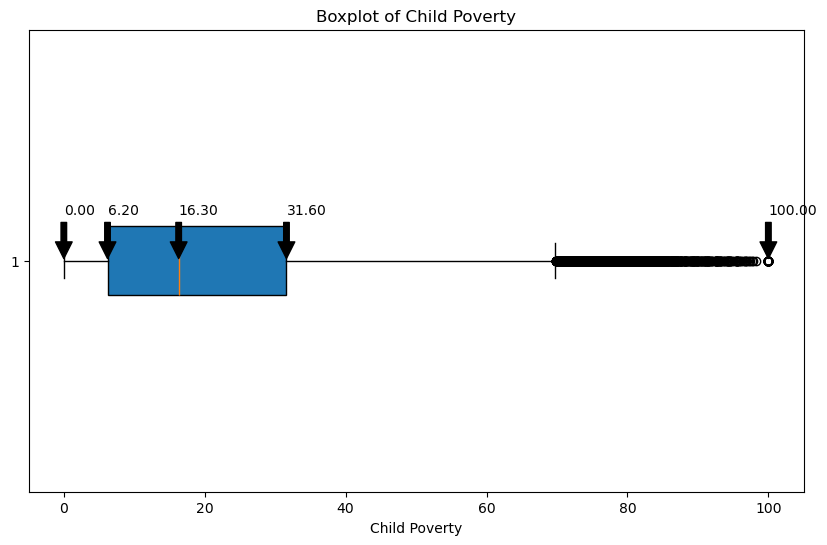

In [23]:
child_poverty_data = data['ChildPoverty']

plt.figure(figsize=(10, 6))
box = plt.boxplot(child_poverty_data, vert=False, patch_artist=True)

# Extracting the statistics
stats = {
    'min': child_poverty_data.min(),
    'Q1': child_poverty_data.quantile(0.25),
    'median': child_poverty_data.median(),
    'Q3': child_poverty_data.quantile(0.75),
    'max': child_poverty_data.max()
}

# Adding annotations
for key, value in stats.items():
    plt.annotate(f'{value:.2f}', xy=(value, 1), xytext=(value, 1.1),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Boxplot of Child Poverty')
plt.xlabel('Child Poverty')
plt.show()

Looking at the distribution of child poverty, we will divide this data into 4 classes along Q1, Median, and Q3 and change the values of ChildPoverty to 1 (Low Poverty) - 4 (High Poverty). This is done in the code block below.

In [24]:
bins = [data['ChildPoverty'].min(), data['ChildPoverty'].quantile(0.25), data['ChildPoverty'].median(), data['ChildPoverty'].quantile(0.75), data['ChildPoverty'].max()]
labels = [1, 2, 3, 4]

# Create a new column with the binned data
data['ChildPovertyClass'] = pd.cut(data['ChildPoverty'], bins=bins, labels=labels, include_lowest=True)

# Print the relevant columns for visualization
print(data[['ChildPoverty', 'ChildPovertyClass']])


       ChildPoverty ChildPovertyClass
0              20.8                 3
1              35.8                 4
2              21.1                 3
3               1.7                 1
4              17.9                 3
...             ...               ...
73996          61.8                 4
73997          39.9                 4
73998          77.2                 4
73999          58.0                 4
74000          72.2                 4

[72718 rows x 2 columns]


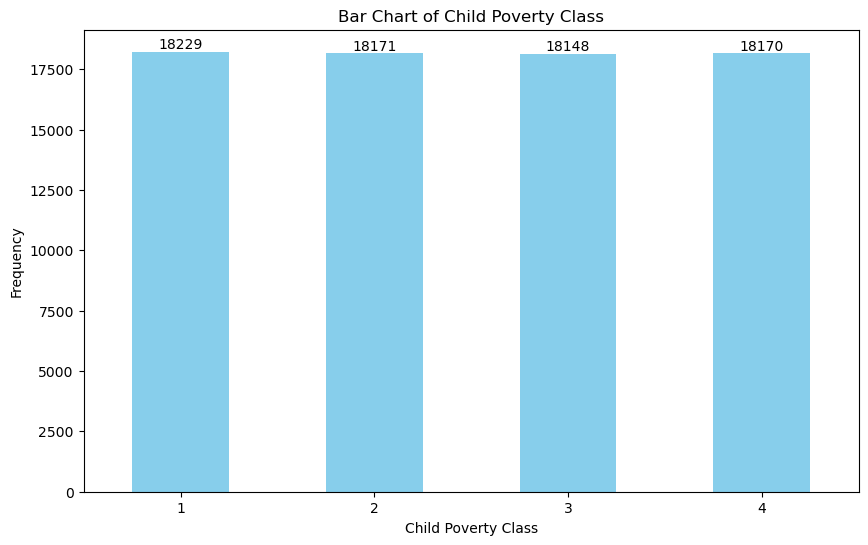

In [25]:
child_poverty_class_counts = data['ChildPovertyClass'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = child_poverty_class_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Child Poverty Class')
plt.xlabel('Child Poverty Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Adding the counts on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, 
             int(bar.get_height()), ha='center', va='bottom', color='black')

plt.show()

As we can see, the four classes of child poverty have within 100 values of each other. This is an acceptable rounding margin due to duplicate poverty percentages, and we can move on to splitting the data.

In [26]:
y = data['ChildPovertyClass']
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['ChildPovertyClass', 'ChildPoverty']), y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 35)
(58174, 4)
(14544, 35)
(14544, 4)


We are balancing data on only Training data based on classes initialized above. 

We chose to balance the data only on the training set, as the objective of balancing data is to ensure the model learns evenly. However, if we introduce a balanced testing set, this could bias the model, as well as preprocess the data, leading to unnecessary data snooping.

## Part 2- Pre-Processing and Initial Modeling

First, let's initialize the model we will use for the rest of this section.

In [27]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
        
        
        # but keep other keywords
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            
        return self



class TLPVectorizedMiniBatchCrossEntropyGlorot(TLPVectorizedMiniBatch):
    """Uses Initialize Weights"""
    

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    
    """Cost function that uses cross entropy"""
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        # cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        # L2_term = self._L2_reg(self.l2_C, W1, W2)
        
        eps = 1e-7
        A3 = np.clip(A3, eps, 1 - eps)
        cost = -np.mean(Y_enc * np.log(A3 + eps) + (1 - Y_enc) * np.log(1 - A3 + eps))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

In [28]:
def convert_data(y_pred):
  returnMe = pd.DataFrame()
  
  returnMe['firstQ'] = (y_pred == 0)
  returnMe['secondQ'] = (y_pred == 1)
  returnMe['thirdQ'] = (y_pred == 2)
  returnMe['fourthQ'] = (y_pred == 3)

  return returnMe

Epoch: 1/500

Epoch: 500/500

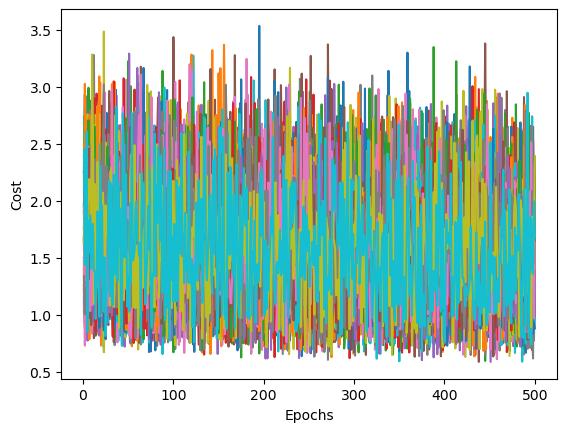

Accuracy: 0.25027502750275027


In [29]:
# train the model
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
model = TLPVectorizedMiniBatchCrossEntropyGlorot(**vals)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Now that we've seen the baseline value for the model, let's normalize any continuous data.

Epoch: 500/500

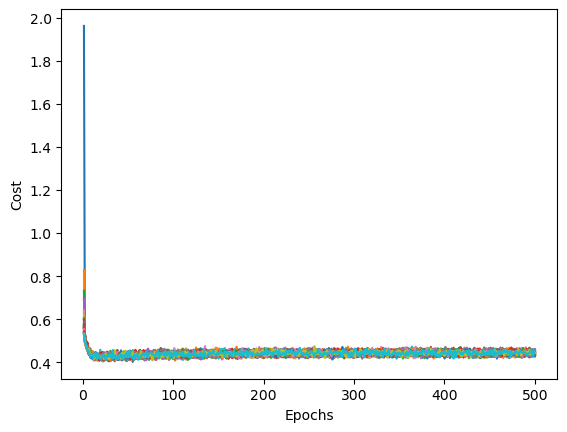

Accuracy: 0.7416804180418042


In [30]:
class Normalized(TLPVectorizedMiniBatchCrossEntropyGlorot):
    def fit(self, X, y, print_progress=False):
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        super().fit(X_norm, y, print_progress=print_progress)
        self.scaler_ = scaler
        
    def predict(self, X):
        X_norm = self.scaler_.transform(X)
        return super().predict(X_norm)
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = NormalizedTwoLayerPerceptron(n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=42)
model = Normalized(**params)
model.fit(X_train, y_train, print_progress=True)

# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy significantly improves after normalization, this should further improve by one hot encoding States, and ChildPovertyClass

In [31]:
# One-Hot Encoding
y = data['ChildPovertyClass'] # target
y = pd.get_dummies(y) # one-hot encoding

X_catagorical = data[['State']] #only the non-numeric data
X_numerical = data.drop(columns=['ChildPovertyClass', 'ChildPoverty', 'State']) #drop the target and any non-numeric data
X_normalized = StandardScaler().fit_transform(X_numerical) #normalize any numerical data

data = np.concatenate((X_catagorical, X_normalized), axis=1) #combine the data back together
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=1) #split the data


Epoch: 500/500

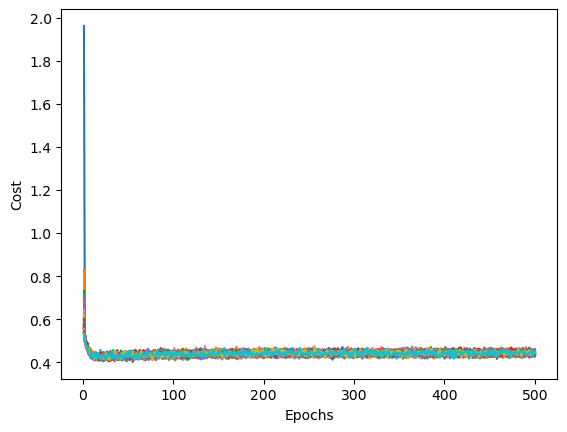

Accuracy: 0.7404427942794279


In [32]:
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = NormalizedTwoLayerPerceptron(n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=42)
model = Normalized(**params)
model.fit(X_train, y_train, print_progress=True)

# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Comparison 
The second model (normalized model) and the third model (normalized and one-hot encoded) performs significantly better than the first model (raw data). The first model has an accuracy of about 25%, while the second and third models have similar accuracies of about 74%. The second model has the highest accuracy at 74.17%, while the third model is not far behind in accuracy at about 74.04%.

The first model, which uses raw data without normalization or one-hot encoding, achieved an accuracy of about 25%. Since the target variable, ChildPovertyClass, has 4 classes, an accuracy of 25% is equivalent to the accuracy of random guessing within 4 classes, showing that this model is not learning effectively. This low accuracy likely stems from the network struggling with features that are on very different scales. For example, numerical features like populartion may have much larger values compared to percentage-based features like poverty rate. Without normalization, the model may focus more on features with larger values and overlook smaller but potentially important features, leading to poor performance.

After normalization has been applied to the model, the accuracy increases significantly, rising from about 25% to 74.17%. As mentioned previously, scaling the features to similar ranges keeps the network from being biased towards features with larger ranges. This enables the network to update weights more effectively, allowing it to learn more meaningful patterns and resulting in a notably higher accuracy.

Adding one-hot encoding in the third model yields an accuracy of about 74.04%, which is a similar accuracy rate to the second model. With one-hot encoding, categorical variables are represented as separate binary features, meaning there is no risk of the model mistakenly assuming an ordinal relationship between categories. One-hot encoding helps the network treat categorical features as distinct, non-ordered values, typically allowing it to learn more effectively from these variables. The only categorical variables in this dataset are ChildPovertyClass and States. Thus, the one-hot encoding may not affect the accuracy significantly because the categorical features may not be as influential as the numeric variables in predicting the child poverty rate.

The most significant improvement in accuracy comes from normalizing the numeric features, which helps the network treat all features equally and allows it to learn better from the given dataset. One-hot encoding does not improve performance substantially compared to normalization on its own. This is likely because for this dataset, the categorical features are less impactful than the numerical features. However, one-hot encoding is still important for handling categorical data correctly and ensuring that the model doesn't misinterpret these features. Therefore, the primary reason for the improved performance is the normalization of continuous numeric features, while the addition of one-hot encoding helps to prevent the model from making incorrect assumptions about categorical variables.

## Part 3- Modeling

## Part 4-Exceptional Work